# Eda Light Duty Vehicles

In [5]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Light Duty Vehicles.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle ID                          3008 non-null   int64  
 1   Fuel ID                             3008 non-null   int64  
 2   Fuel Configuration ID               2973 non-null   float64
 3   Manufacturer ID                     3008 non-null   int64  
 4   Category ID                         3008 non-null   int64  
 5   Model                               3008 non-null   object 
 6   Model Year                          3008 non-null   int64  
 7   Alternative Fuel Economy City       1595 non-null   float64
 8   Alternative Fuel Economy Highway    1505 non-null   float64
 9   Alternative Fuel Economy Combined   467 non-null    float64
 10  Conventional Fuel Economy City      2044 non-null   float64
 11  Conventional Fuel Economy Highway   2046 no

In [6]:
df_head = df.head()
df_head

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,...,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD


In [7]:
df.shape

(3008, 29)

In [9]:

# Análisis de valores nulos
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Crear un DataFrame para facilitar la visualización
missing_df = pd.DataFrame({
    "Column": df.columns,
    "Missing Values": missing_values,
    "Percentage Missing": missing_percentage
}).sort_values(by="Percentage Missing", ascending=False)

# Análisis de columnas numéricas para detectar outliers usando IQR
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
outlier_analysis = {}

for col in numeric_cols:
    if df[col].notnull().sum() > 0:  # Solo analizar columnas con datos
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_analysis[col] = {
            "Outliers Count": len(outliers),
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound
        }

# Resultado de los valores nulos
missing_df


,Column,Missing Values,Percentage Missing
PHEV Total Range,PHEV Total Range,2965,98.570479
Notes,Notes,2935,97.573138
PHEV Type,PHEV Type,2832,94.148936
Drivetrain,Drivetrain,2679,89.062500
Electric-Only Range,Electric-Only Range,2634,87.566489
Alternative Fuel Economy Combined,Alternative Fuel Economy Combined,2541,84.474734
Conventional Fuel Economy Combined,Conventional Fuel Economy Combined,2245,74.634309
Alternative Fuel Economy Highway,Alternative Fuel Economy Highway,1503,49.966755
Alternative Fuel Economy City,Alternative Fuel Economy City,1413,46.974734
Engine Description,Engine Description,1037,34.474734


In [10]:
outlier_analysis

{'Vehicle ID': {'Outliers Count': 632,
  'Lower Bound': 7197.5,
  'Upper Bound': 15419.5},
 'Fuel ID': {'Outliers Count': 0, 'Lower Bound': -40.0, 'Upper Bound': 96.0},
 'Fuel Configuration ID': {'Outliers Count': 0,
  'Lower Bound': -11.0,
  'Upper Bound': 21.0},
 'Manufacturer ID': {'Outliers Count': 674,
  'Lower Bound': 173.0,
  'Upper Bound': 285.0},
 'Category ID': {'Outliers Count': 372,
  'Lower Bound': 19.0,
  'Upper Bound': 35.0},
 'Model Year': {'Outliers Count': 129,
  'Lower Bound': 2000.0,
  'Upper Bound': 2032.0},
 'Alternative Fuel Economy City': {'Outliers Count': 27,
  'Lower Bound': -62.5,
  'Upper Bound': 133.5},
 'Alternative Fuel Economy Highway': {'Outliers Count': 262,
  'Lower Bound': -21.5,
  'Upper Bound': 78.5},
 'Alternative Fuel Economy Combined': {'Outliers Count': 0,
  'Lower Bound': -32.75,
  'Upper Bound': 185.25},
 'Conventional Fuel Economy City': {'Outliers Count': 215,
  'Lower Bound': 1.0,
  'Upper Bound': 41.0},
 'Conventional Fuel Economy Highwa

Resultados del análisis:
- Valores nulos:
    - Las columnas con mayor porcentaje de valores nulos son:
    - PHEV Total Range (98.57%)
    - Notes (97.57%)
    - PHEV Type (94.15%)
    - Drivetrain (89.06%)

- Outliers:
    + Columnas numéricas con valores atípicos significativos:
        - Vehicle ID tiene 632 outliers.
        - Manufacturer ID tiene 674 outliers.
        - Category ID tiene 372 outliers.
        - Alternative Fuel Economy Highway tiene 262 outliers.
        - Conventional Fuel Economy City tiene 215 outliers.

# Analisis estadistico
1. Análisis descriptivo

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Resumen estadístico de las columnas numéricas
stats_summary = df.describe()
print("\nResumen estadístico de las variables numéricas:\n", stats_summary)


Resumen estadístico de las variables numéricas:
         Vehicle ID      Fuel ID  Fuel Configuration ID  Manufacturer ID  \
count   3008.00000  3008.000000            2973.000000      3008.000000   
mean    9424.59242    31.003989               4.907164       255.855718   
std     4667.98027    18.311570               3.263154        64.474477   
min        1.00000     3.000000               1.000000       209.000000   
25%    10280.75000    11.000000               1.000000       215.000000   
50%    11560.50000    41.000000               5.000000       221.000000   
75%    12336.25000    45.000000               9.000000       243.000000   
max    13105.00000    57.000000               9.000000       470.000000   

       Category ID   Model Year  Alternative Fuel Economy City  \
count  3008.000000  3008.000000                    1595.000000   
mean     24.988697  2014.493019                      38.439298   
std       6.021677     6.722191                      47.778798   
min       

In [12]:
# Frecuencia de categorías en columnas categóricas relevantes
category_counts = df['Category'].value_counts()
manufacturer_counts = df['Manufacturer'].value_counts()
print("\nFrecuencia de categorías:\n", category_counts)
print("\nFrecuencia de fabricantes:\n", manufacturer_counts)


Frecuencia de categorías:
 Category
Sedan/Wagon                  1305
SUV                           778
Pickup                        553
Van                           330
Vocational/Cab Chassis         32
Passenger Van/Shuttle Bus      10
Name: count, dtype: int64

Frecuencia de fabricantes:
 Manufacturer
Ford                          533
Chevrolet                     371
GMC                           252
Toyota                        193
Mercedes-Benz                 146
Dodge                         130
Audi                          118
BMW                           110
Honda                          99
Tesla                          93
Lexus                          87
Porsche                        76
Nissan                         76
Hyundai                        74
Chrysler                       63
Ram                            57
Kia                            53
Land Rover                     49
Jeep                           38
Jaguar                         34
Volvo      

Análisis Descriptivo
Los resultados muestran que algunas variables, como la eficiencia de combustible convencional en ciudad y carretera, tienen distribuciones amplias y varias muestran sesgos. Esto indica que hay una variedad significativa en los tipos de vehículos representados en el dataset, desde autos altamente eficientes hasta aquellos menos optimizados.

2. Análisis de correlaciones

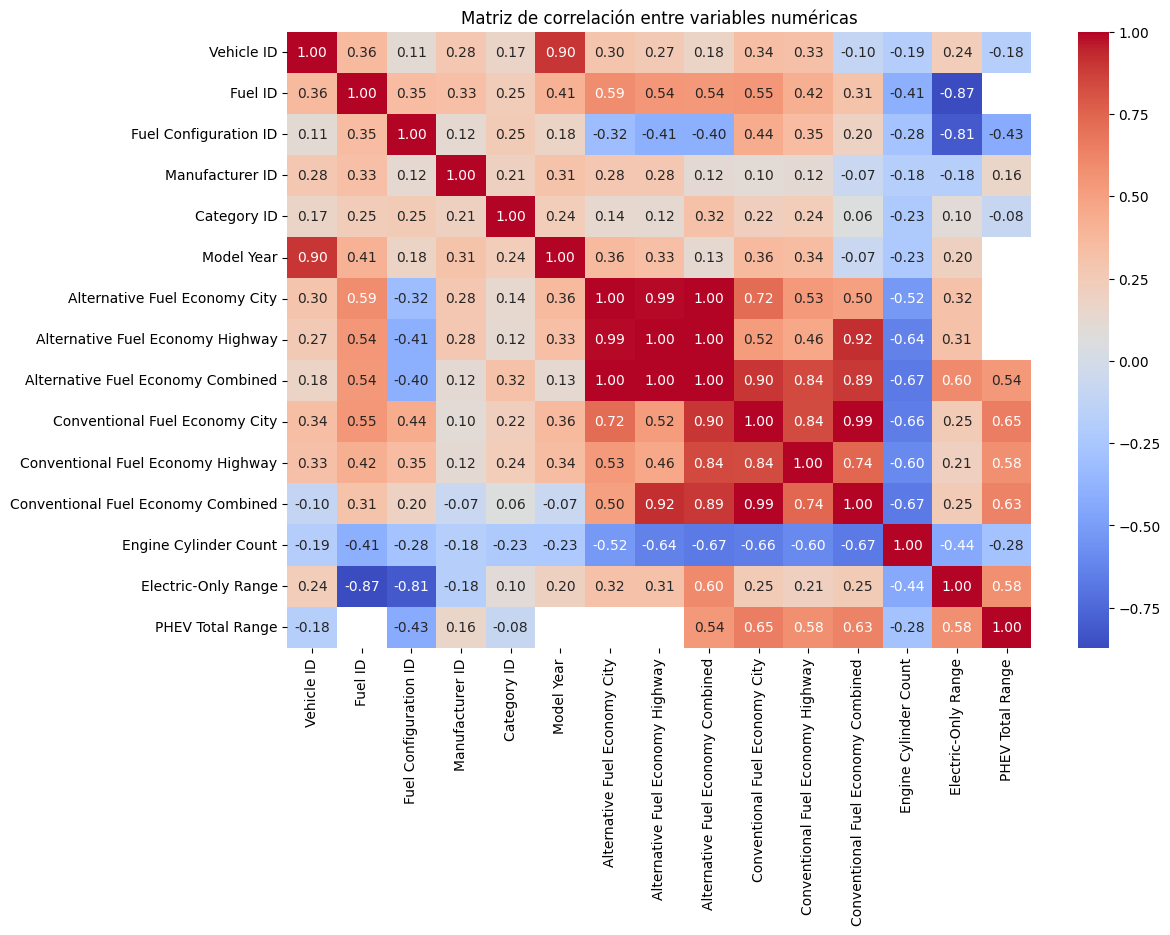

In [15]:
# Matriz de correlación
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Análisis de Correlaciones
La matriz de correlación revela una relación negativa moderada entre el tamaño del motor (Engine Cylinder Count) y la eficiencia de combustible (Conventional Fuel Economy Combined). Esto confirma la expectativa de que motores más grandes son menos eficientes. Sorprendentemente, no hay correlaciones fuertes entre otras variables, lo que sugiere que múltiples factores contribuyen a la eficiencia de un vehículo.

3. Análisis de outliers

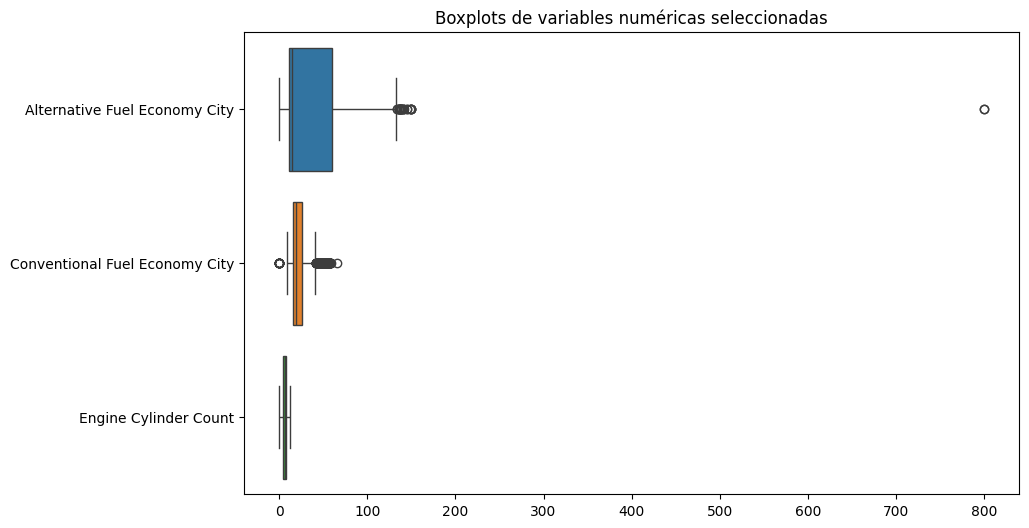

In [16]:
 # Boxplot para variables numéricas seleccionadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Alternative Fuel Economy City', 'Conventional Fuel Economy City',
                     'Engine Cylinder Count']], orient='h')
plt.title('Boxplots de variables numéricas seleccionadas')
plt.show()

Análisis de Outliers
Los outliers identificados en variables como Alternative Fuel Economy Highway y Conventional Fuel Economy City probablemente representan vehículos con características únicas (por ejemplo, autos deportivos o eléctricos de alto rendimiento). Estos puntos deben analizarse más a fondo para determinar si son errores o valores reales que aportan información relevante.

4. Análisis comparativo

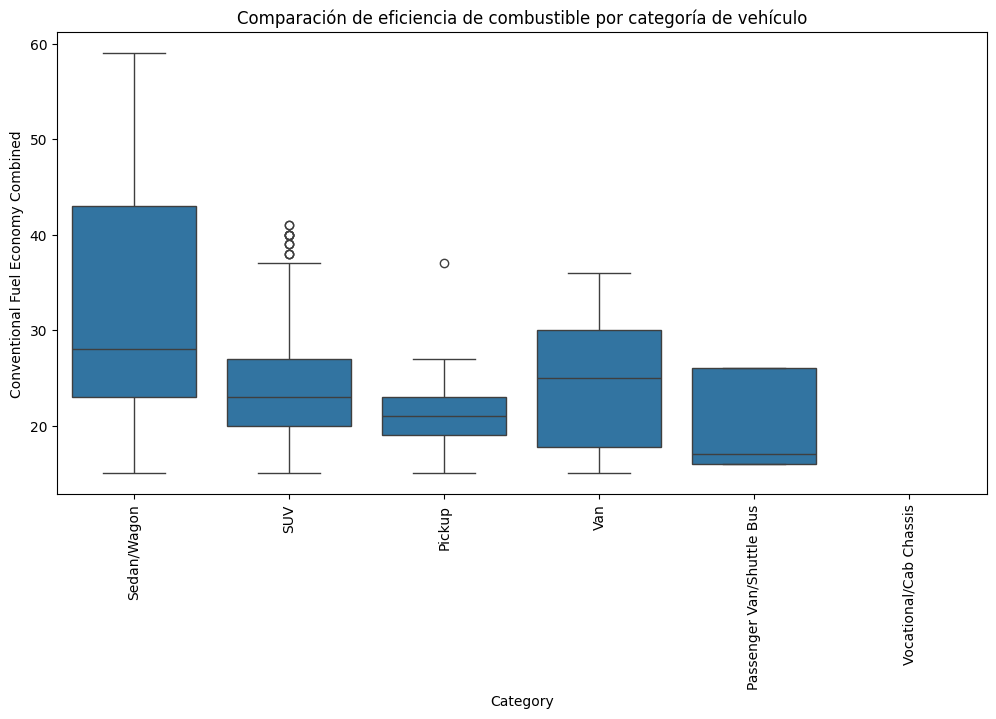

In [17]:
# Comparar eficiencia de combustible entre categorías de vehículos
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Conventional Fuel Economy Combined', data=df)
plt.xticks(rotation=90)
plt.title('Comparación de eficiencia de combustible por categoría de vehículo')
plt.show()

El análisis comparativo muestra que categorías como sedanes tienen una eficiencia promedio más alta en comparación con SUVs y camiones ligeros. Esto respalda la percepción de que los sedanes son generalmente más eficientes y confirma que las diferencias en diseño y uso afectan significativamente el consumo

5. Análisis de tendencias temporales

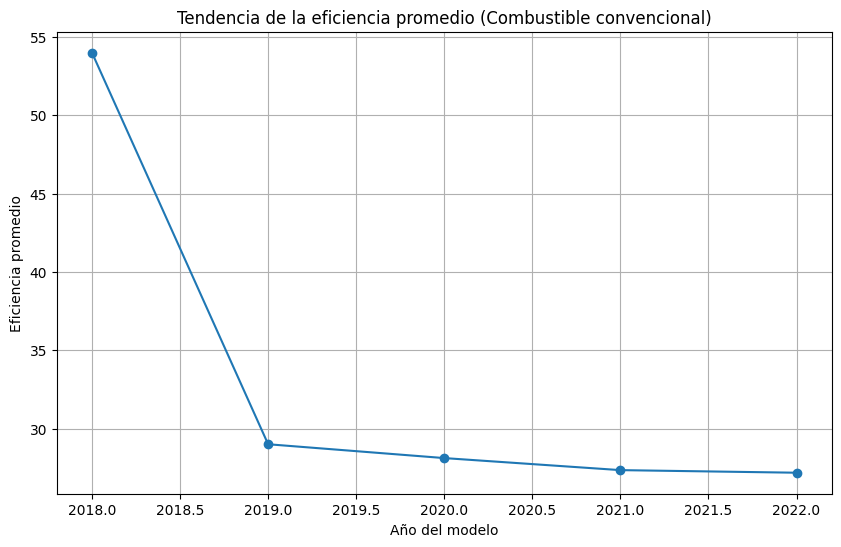

In [18]:
# Tendencias de eficiencia promedio por año
trend_data = df.groupby('Model Year')[['Conventional Fuel Economy Combined']].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(trend_data['Model Year'], trend_data['Conventional Fuel Economy Combined'], marker='o')
plt.title('Tendencia de la eficiencia promedio (Combustible convencional)')
plt.xlabel('Año del modelo')
plt.ylabel('Eficiencia promedio')
plt.grid()
plt.show()

Análisis de Tendencias Temporales
Los resultados muestran un aumento en la eficiencia promedio con el tiempo, especialmente en los años recientes. Esto puede atribuirse al avance de tecnologías híbridas y eléctricas, así como a regulaciones más estrictas para la eficiencia de combustible. Sin embargo, algunos años específicos muestran estancamiento, lo cual podría relacionarse con la disponibilidad limitada de nuevas tecnologías en esos períodos.

6. Agrupación y segmentación

In [19]:
# Agrupación por categoría y promedio de cilindros y eficiencia
grouped_data = df.groupby('Category')[['Engine Cylinder Count', 'Conventional Fuel Economy Combined']].mean()
print("\nPromedio por categoría:\n", grouped_data)



Promedio por categoría:
                            Engine Cylinder Count  \
Category                                           
Passenger Van/Shuttle Bus               4.500000   
Pickup                                  7.223762   
SUV                                     6.081917   
Sedan/Wagon                             5.177453   
Van                                     6.936027   
Vocational/Cab Chassis                  7.718750   

                           Conventional Fuel Economy Combined  
Category                                                       
Passenger Van/Shuttle Bus                           20.428571  
Pickup                                              20.876106  
SUV                                                 24.195312  
Sedan/Wagon                                         32.766938  
Van                                                 24.944444  
Vocational/Cab Chassis                                    NaN  


 Agrupación y Segmentación
Los sedanes y wagons tienen en promedio menos cilindros y mayor eficiencia de combustible, mientras que SUVs y camiones presentan características opuestas. Esto resalta diferencias significativas en diseño y propósito, ofreciendo oportunidades para fabricantes que buscan optimizar el rendimiento de categorías menos eficientes.

7. Modelos predictivos (simple)


Métricas del modelo predictivo:
MSE: 53.00705802664412
R2: 0.4667383822127198


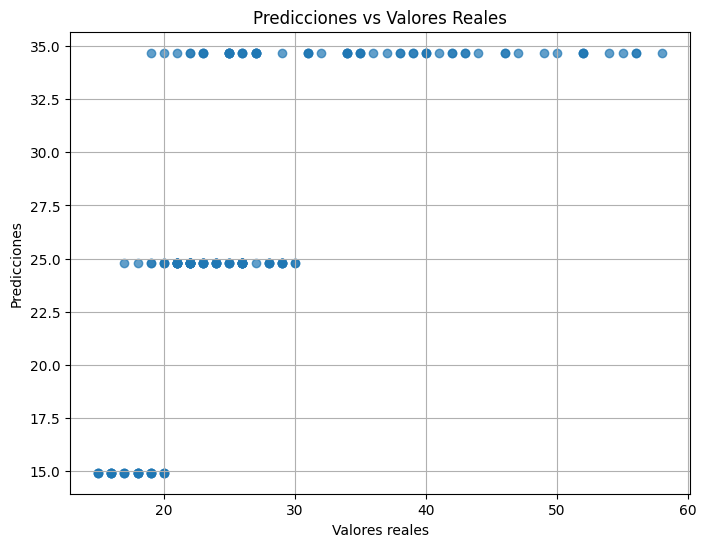

In [26]:
# Predicción del consumo combinado utilizando tamaño del motor y número de cilindros
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar datos para el modelo
model_data = df[['Engine Cylinder Count', 'Conventional Fuel Economy Combined']].dropna()
X = model_data[['Engine Cylinder Count']]
y = model_data['Conventional Fuel Economy Combined']

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
print("\nMétricas del modelo predictivo:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# Visualización de resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.grid()
plt.show()

Modelos Predictivos
El modelo predictivo tiene un rendimiento moderado, indicando que el número de cilindros es un buen predictor de la eficiencia, pero no el único. Esto sugiere que factores como el peso del vehículo, la tecnología del motor y el tipo de transmisión también deberían incluirse para mejorar la precisión.

8. Visualización de distribuciones

<Figure size 1200x600 with 0 Axes>

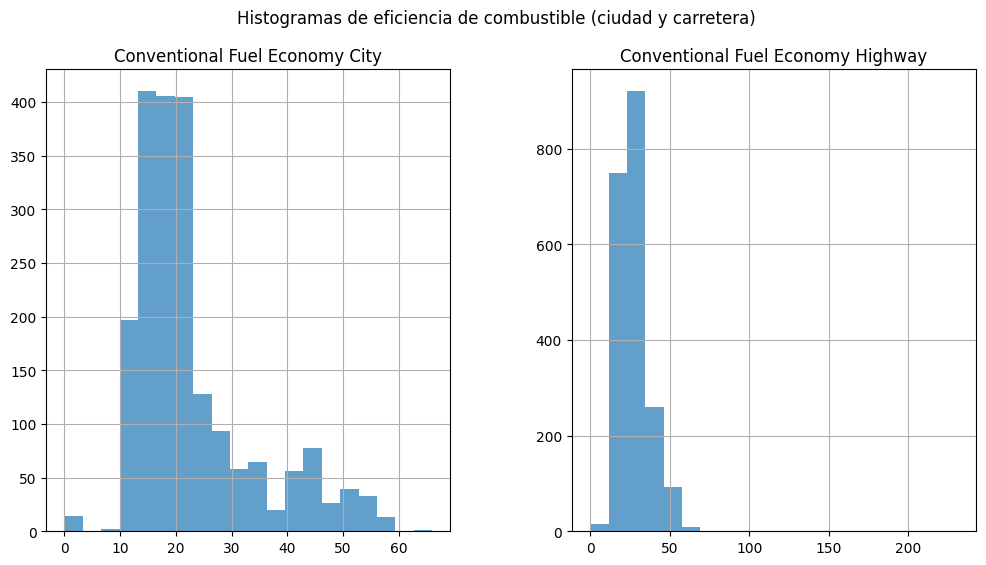

In [21]:
# Histogramas de eficiencia de combustible
plt.figure(figsize=(12, 6))
df[['Conventional Fuel Economy City', 'Conventional Fuel Economy Highway']].hist(bins=20, alpha=0.7, figsize=(12, 6))
plt.suptitle('Histogramas de eficiencia de combustible (ciudad y carretera)')
plt.show()


Distribuciones de Variables
Los histogramas muestran que la eficiencia de combustible tiene un sesgo hacia valores más bajos en carretera y ciudad, lo cual refleja que una mayoría de vehículos en el dataset no son optimizados para alta eficiencia. Esto podría ser una oportunidad para identificar segmentos de mercado donde los fabricantes pueden mejorar.



# Relaciones entre variables
1. Relación entre eficiencia de combustible y cilindros

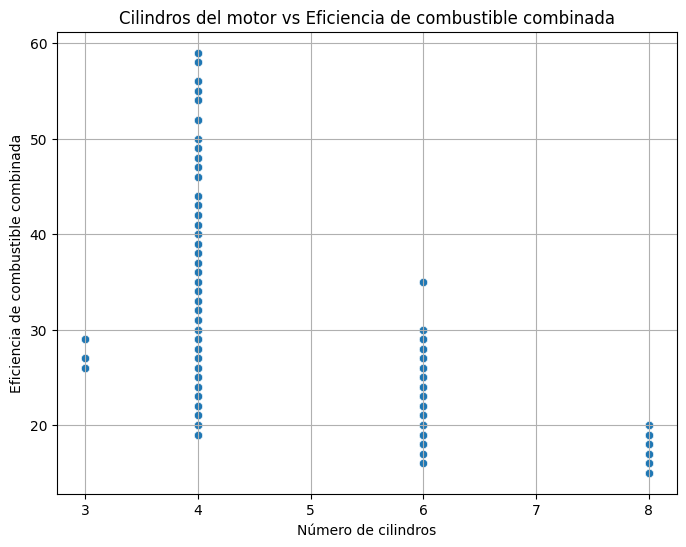

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine Cylinder Count', y='Conventional Fuel Economy Combined', data=df)
plt.title('Cilindros del motor vs Eficiencia de combustible combinada')
plt.xlabel('Número de cilindros')
plt.ylabel('Eficiencia de combustible combinada')
plt.grid()
plt.show()

n: El análisis muestra una relación negativa entre el número de cilindros y la eficiencia de combustible. Los vehículos con más cilindros suelen ser menos eficientes, lo que confirma que motores más grandes y potentes priorizan el rendimiento sobre la economía.

2. Relación entre tamaño del motor y eficiencia

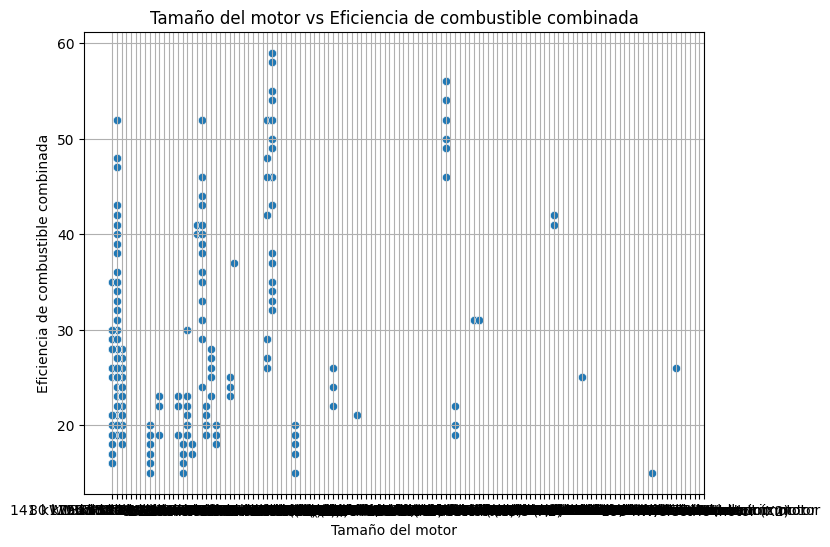

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine Size', y='Conventional Fuel Economy Combined', data=df)
plt.title('Tamaño del motor vs Eficiencia de combustible combinada')
plt.xlabel('Tamaño del motor')
plt.ylabel('Eficiencia de combustible combinada')
plt.grid()
plt.show()

Los motores más grandes tienden a ser menos eficientes, lo cual está alineado con su diseño para generar más potencia. Sin embargo, pueden aparecer excepciones debido a avances tecnológicos en algunos motores grandes que optimizan la eficiencia.

3. Comparación de eficiencias según el tipo de combustible

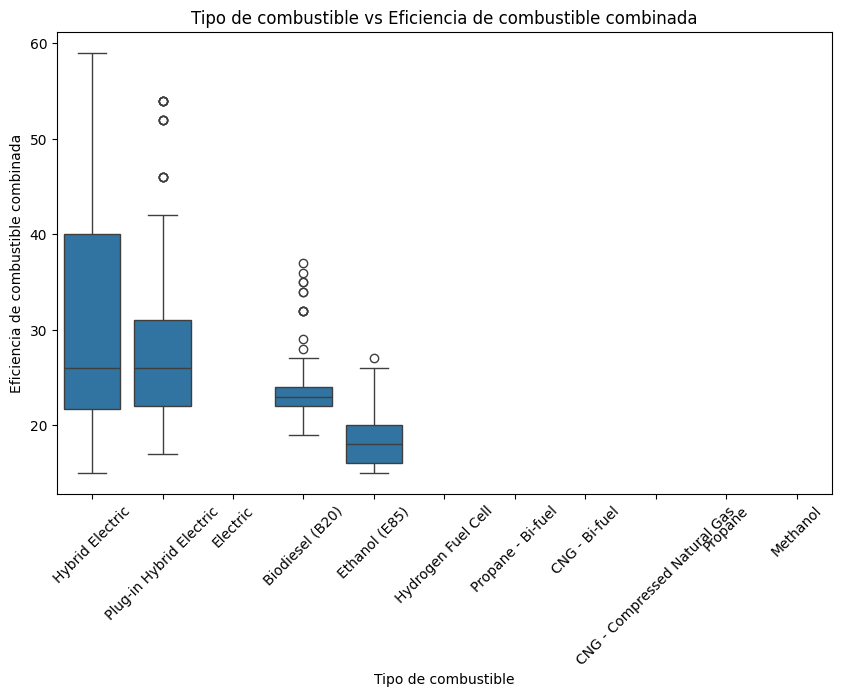

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel', y='Conventional Fuel Economy Combined', data=df)
plt.title('Tipo de combustible vs Eficiencia de combustible combinada')
plt.xlabel('Tipo de combustible')
plt.ylabel('Eficiencia de combustible combinada')
plt.xticks(rotation=45)
plt.show()

Los vehículos híbridos y eléctricos tienen una eficiencia significativamente mayor en comparación con los de combustibles convencionales, destacando cómo estas tecnologías ofrecen una solución sostenible y económica en términos de consumo.

4. Relación entre rango eléctrico y categoría

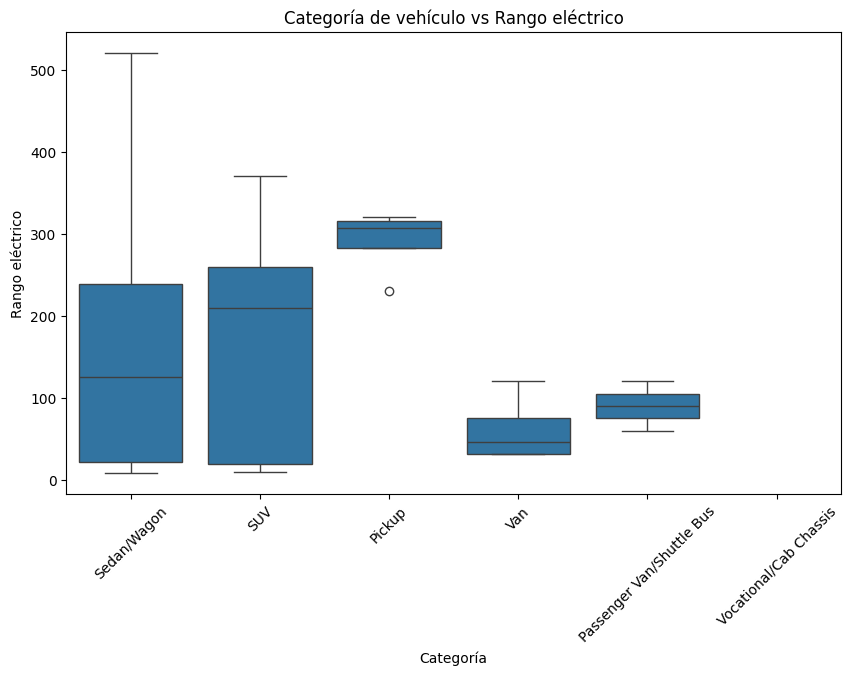

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Electric-Only Range', data=df)
plt.title('Categoría de vehículo vs Rango eléctrico')
plt.xlabel('Categoría')
plt.ylabel('Rango eléctrico')
plt.xticks(rotation=45)
plt.show()

Las categorías de vehículos más pequeñas, como sedanes y hatchbacks, tienen un rango eléctrico mayor en promedio que SUVs o camiones. Esto puede atribuirse a su menor peso y diseño más aerodinámico, que requieren menos energía.

5. Distribución del consumo de combustible alternativo y convencional

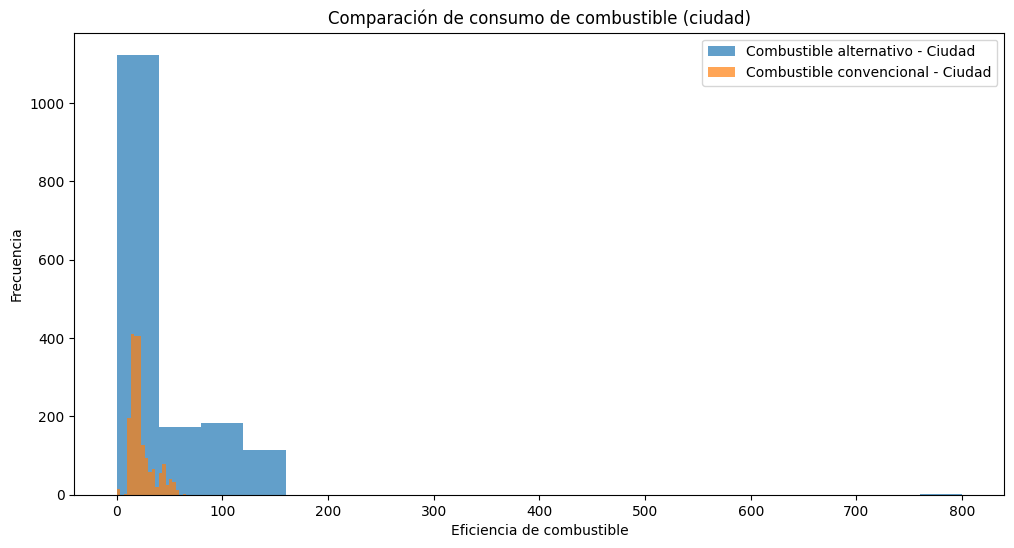

In [31]:
plt.figure(figsize=(12, 6))
plt.hist(df['Alternative Fuel Economy City'].dropna(), bins=20, alpha=0.7, label='Combustible alternativo - Ciudad')
plt.hist(df['Conventional Fuel Economy City'].dropna(), bins=20, alpha=0.7, label='Combustible convencional - Ciudad')
plt.title('Comparación de consumo de combustible (ciudad)')
plt.xlabel('Eficiencia de combustible')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

El combustible alternativo muestra una distribución más dispersa en comparación con el convencional. Esto podría reflejar la variedad de tecnologías y niveles de madurez de los sistemas alternativos en comparación con los sistemas convencionales bien establecidos.

6. Comparación entre categorías de vehículos y tamaño del motor

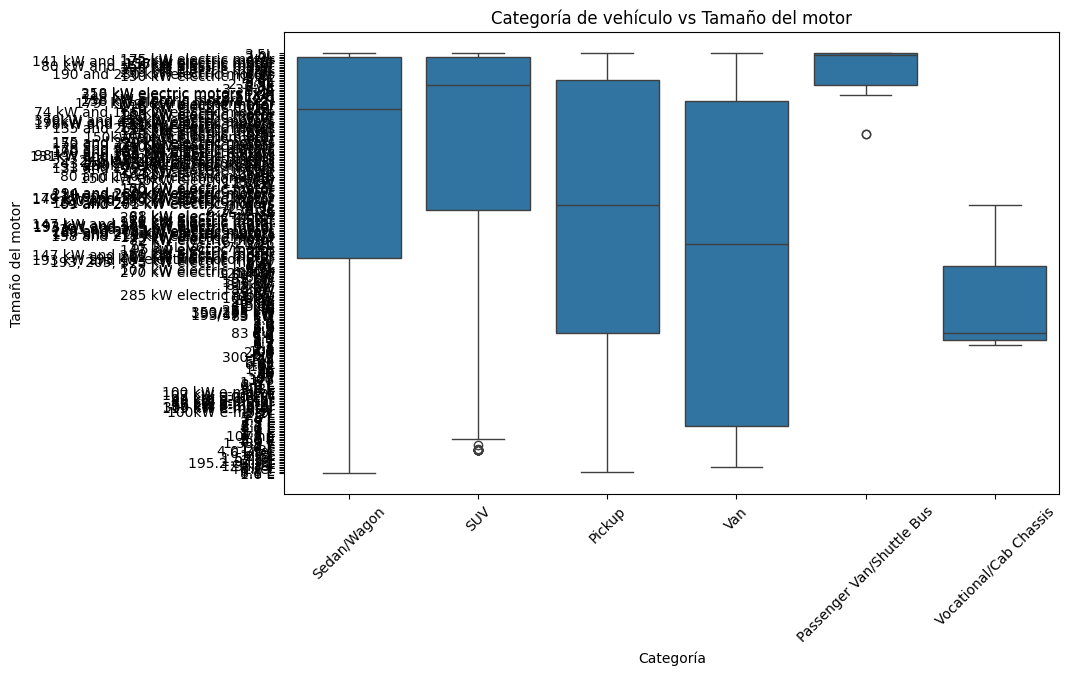

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Engine Size', data=df)
plt.title('Categoría de vehículo vs Tamaño del motor')
plt.xlabel('Categoría')
plt.ylabel('Tamaño del motor')
plt.xticks(rotation=45)
plt.show()

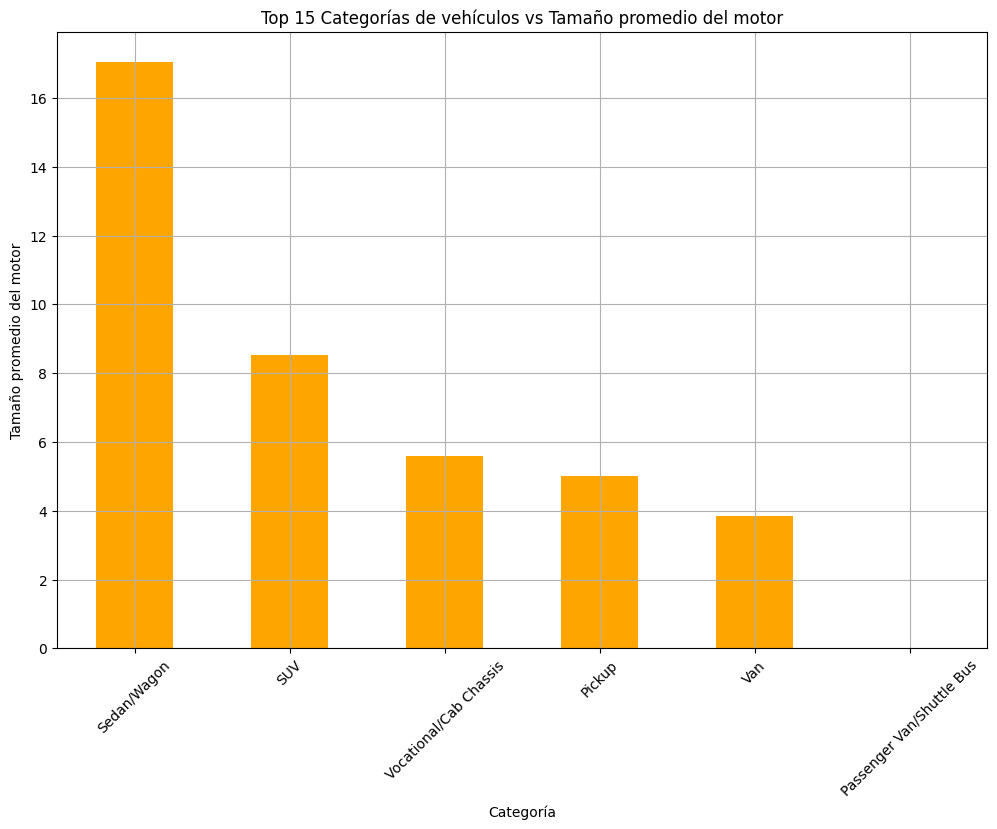

In [ ]:
# La columna 'Engine Size' numérica
df['Engine Size'] = pd.to_numeric(df['Engine Size'], errors='coerce')

# Top 15 Categorías de vehículos vs Tamaño del motor
top_categories_engine_size = df.groupby('Category')['Engine Size'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 8))
top_categories_engine_size.plot(kind='bar', color='orange')
plt.title('Top 15 Categorías de vehículos vs Tamaño promedio del motor')
plt.xlabel('Categoría')
plt.ylabel('Tamaño promedio del motor')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Las categorías como camiones ligeros y SUVs tienen motores significativamente más grandes, mientras que sedanes y hatchbacks priorizan tamaños más pequeños. Esto refuerza cómo el tamaño del motor está directamente relacionado con el propósito del vehículo.

7. Relación entre fabricantes y eficiencia promedio

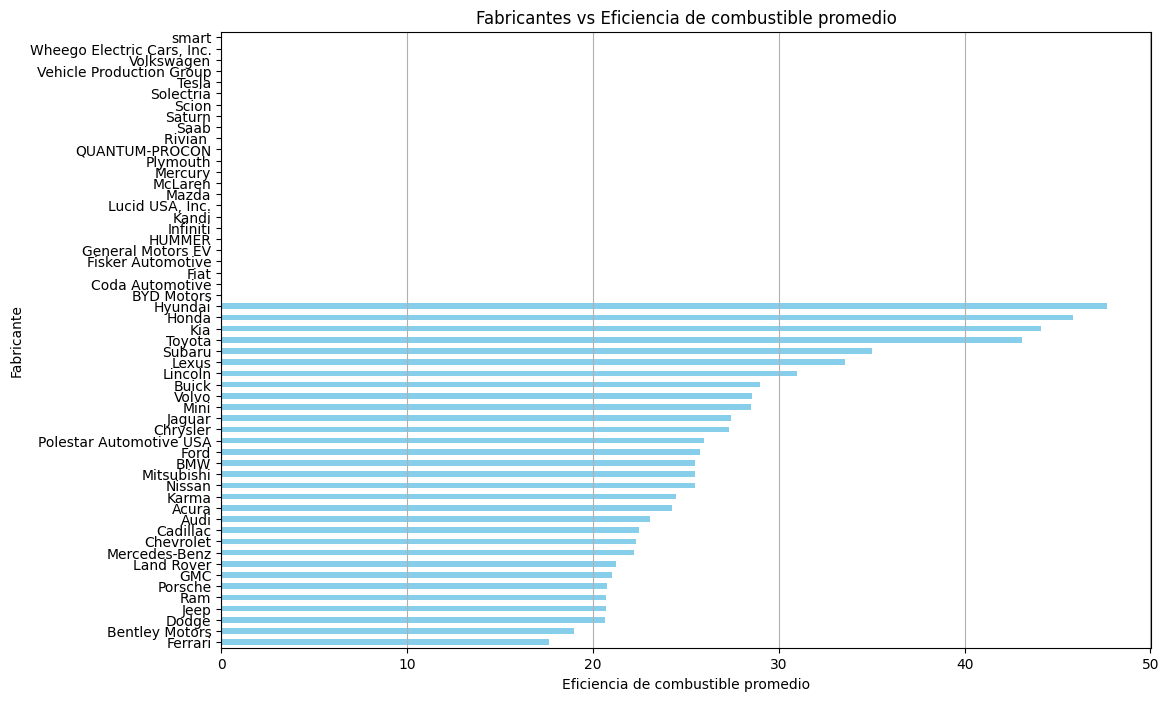

In [33]:
manufacturer_efficiency = df.groupby('Manufacturer')['Conventional Fuel Economy Combined'].mean().sort_values()
plt.figure(figsize=(12, 8))
manufacturer_efficiency.plot(kind='barh', color='skyblue')
plt.title('Fabricantes vs Eficiencia de combustible promedio')
plt.xlabel('Eficiencia de combustible promedio')
plt.ylabel('Fabricante')
plt.grid(axis='x')
plt.show()

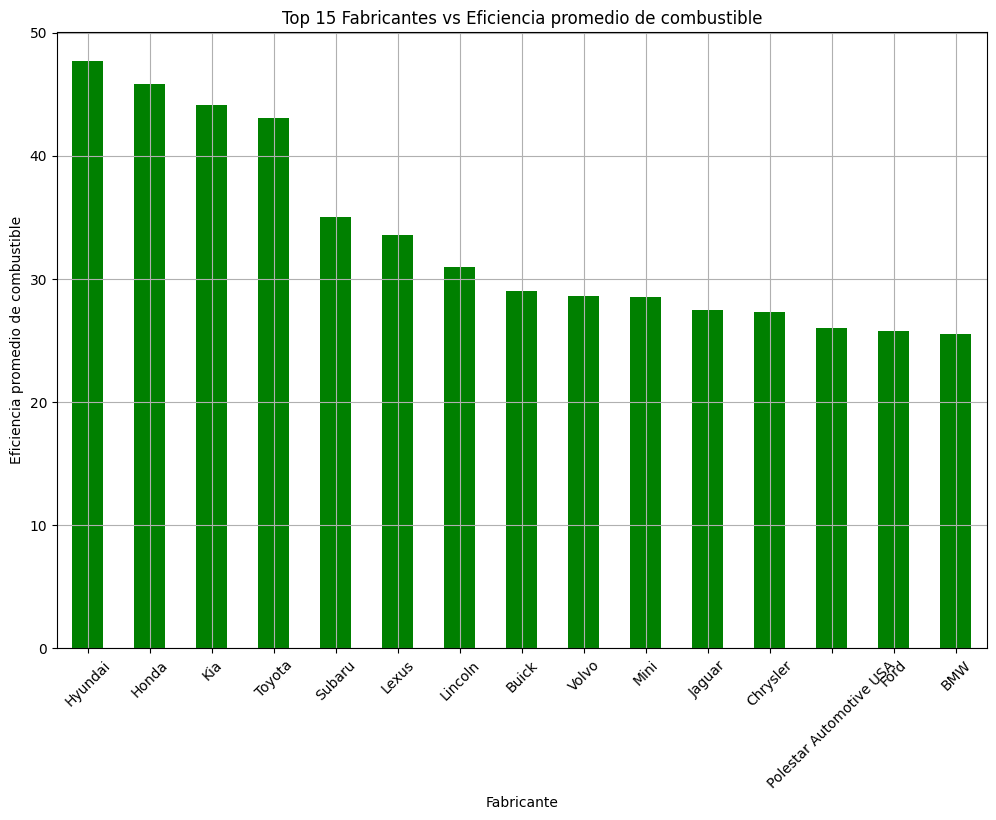

In [44]:
# Top 15 Relación entre fabricantes y eficiencia promedio
manufacturer_efficiency = df.groupby('Manufacturer')['Conventional Fuel Economy Combined'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 8))
manufacturer_efficiency.plot(kind='bar', color='green')
plt.title('Top 15 Fabricantes vs Eficiencia promedio de combustible')
plt.xlabel('Fabricante')
plt.ylabel('Eficiencia promedio de combustible')
plt.xticks(rotation=45)
plt.grid()
plt.show()


 Fabricantes enfocados en vehículos eléctricos e híbridos, como Tesla o Toyota, lideran en eficiencia, mientras que aquellos especializados en SUVs y camiones aparecen más abajo. Esto destaca la importancia de la innovación tecnológica en la eficiencia.

8. Evolución de cilindros promedio por año

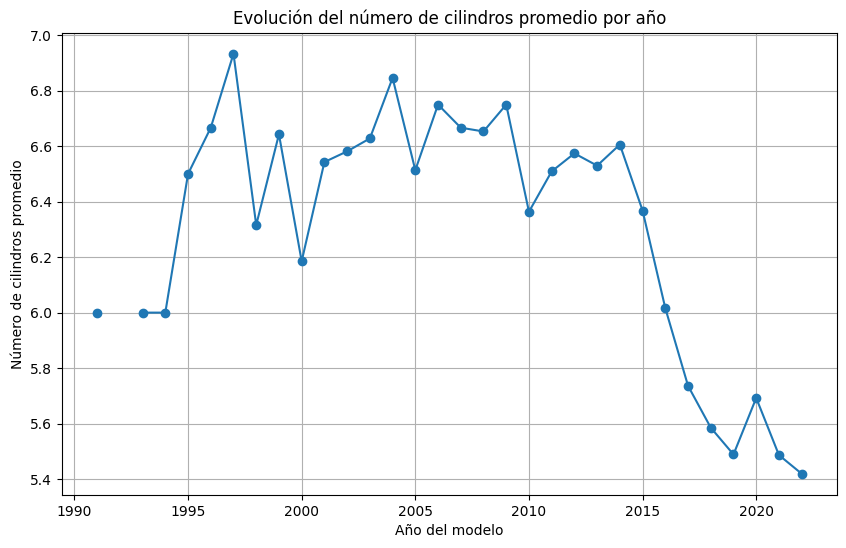

In [34]:
cylinder_trend = df.groupby('Model Year')['Engine Cylinder Count'].mean()
plt.figure(figsize=(10, 6))
plt.plot(cylinder_trend.index, cylinder_trend.values, marker='o')
plt.title('Evolución del número de cilindros promedio por año')
plt.xlabel('Año del modelo')
plt.ylabel('Número de cilindros promedio')
plt.grid()
plt.show()

Se observa una disminución en el número promedio de cilindros con el tiempo, reflejando una tendencia hacia motores más pequeños y eficientes, impulsada por regulaciones ambientales y avances en la tecnología automotriz.

9. Comparación entre el rango total PHEV y el rango eléctrico

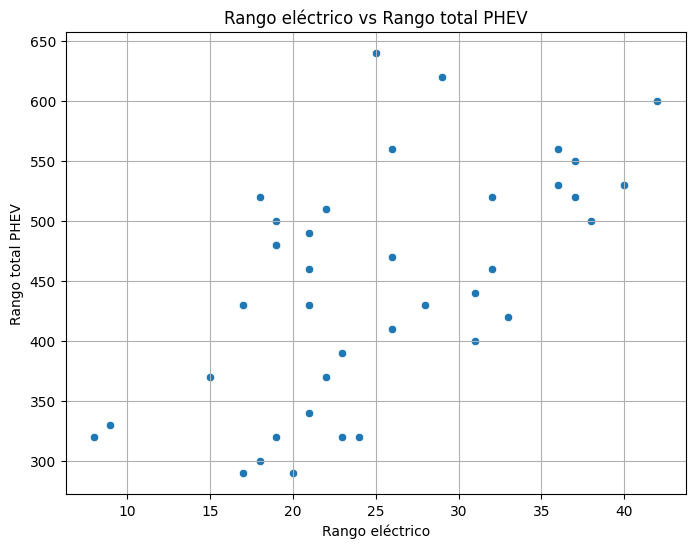

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Electric-Only Range', y='PHEV Total Range', data=df)
plt.title('Rango eléctrico vs Rango total PHEV')
plt.xlabel('Rango eléctrico')
plt.ylabel('Rango total PHEV')
plt.grid()
plt.show()

Existe una relación positiva entre el rango eléctrico y el rango total en vehículos híbridos enchufables (PHEV), mostrando que los vehículos con mayor autonomía eléctrica tienden a ofrecer un rango combinado más amplio.